In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv(r'..\data\onlinedeliverydata.csv')

In [5]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [21]:
df.shape

(388, 55)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [23]:
df.isna().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

In [24]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [25]:
df['Monthly Income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

Output
Yes    0.775773
No     0.224227
Name: proportion, dtype: float64


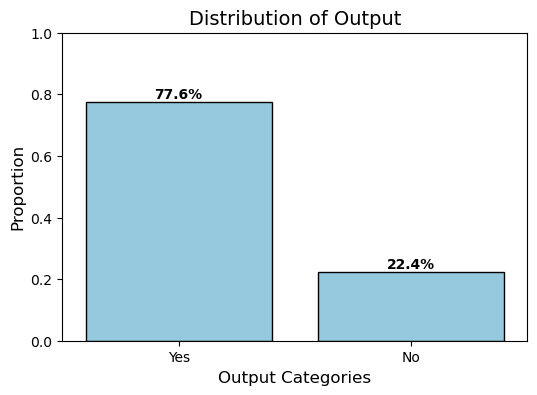

In [37]:
output_counts = df['Output'].value_counts(normalize=True)

print(output_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=output_counts.index, y=output_counts.values, color='skyblue', edgecolor='black')

plt.title("Distribution of Output", fontsize=14)
plt.xlabel("Output Categories", fontsize=12)
plt.ylabel("Proportion", fontsize=12)

for i, v in enumerate(output_counts.values):
    plt.text(i, v + 0.01, f"{v*100:.1f}%", ha='center', fontweight='bold')

plt.ylim(0, 1)
plt.show()

Monthly Income
No Income          0.481959
25001 to 50000     0.177835
More than 50000    0.159794
10001 to 25000     0.115979
Below Rs.10000     0.064433
Name: proportion, dtype: float64


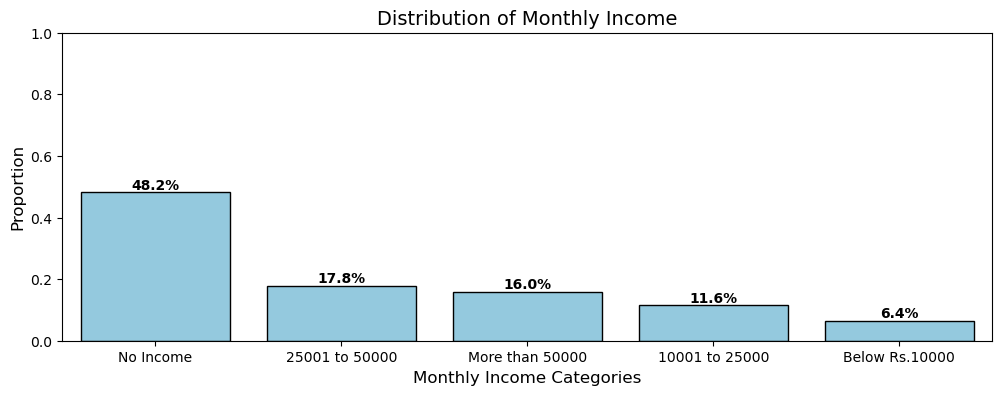

In [36]:
output_counts = df['Monthly Income'].value_counts(normalize=True)

print(output_counts)

plt.figure(figsize=(12,4))
sns.barplot(x=output_counts.index, y=output_counts.values, color='skyblue', edgecolor='black')

plt.title("Distribution of Monthly Income", fontsize=14)
plt.xlabel("Monthly Income Categories", fontsize=12)
plt.ylabel("Proportion", fontsize=12)

for i, v in enumerate(output_counts.values):
    plt.text(i, v + 0.01, f"{v*100:.1f}%", ha='center', fontweight='bold')

plt.ylim(0, 1)
plt.show()

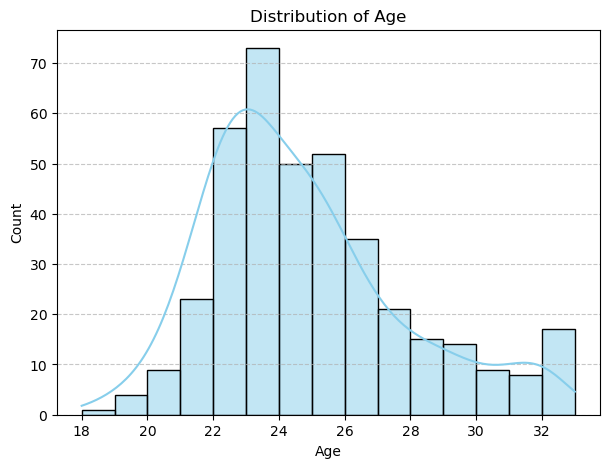

In [35]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue', edgecolor='black')

plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

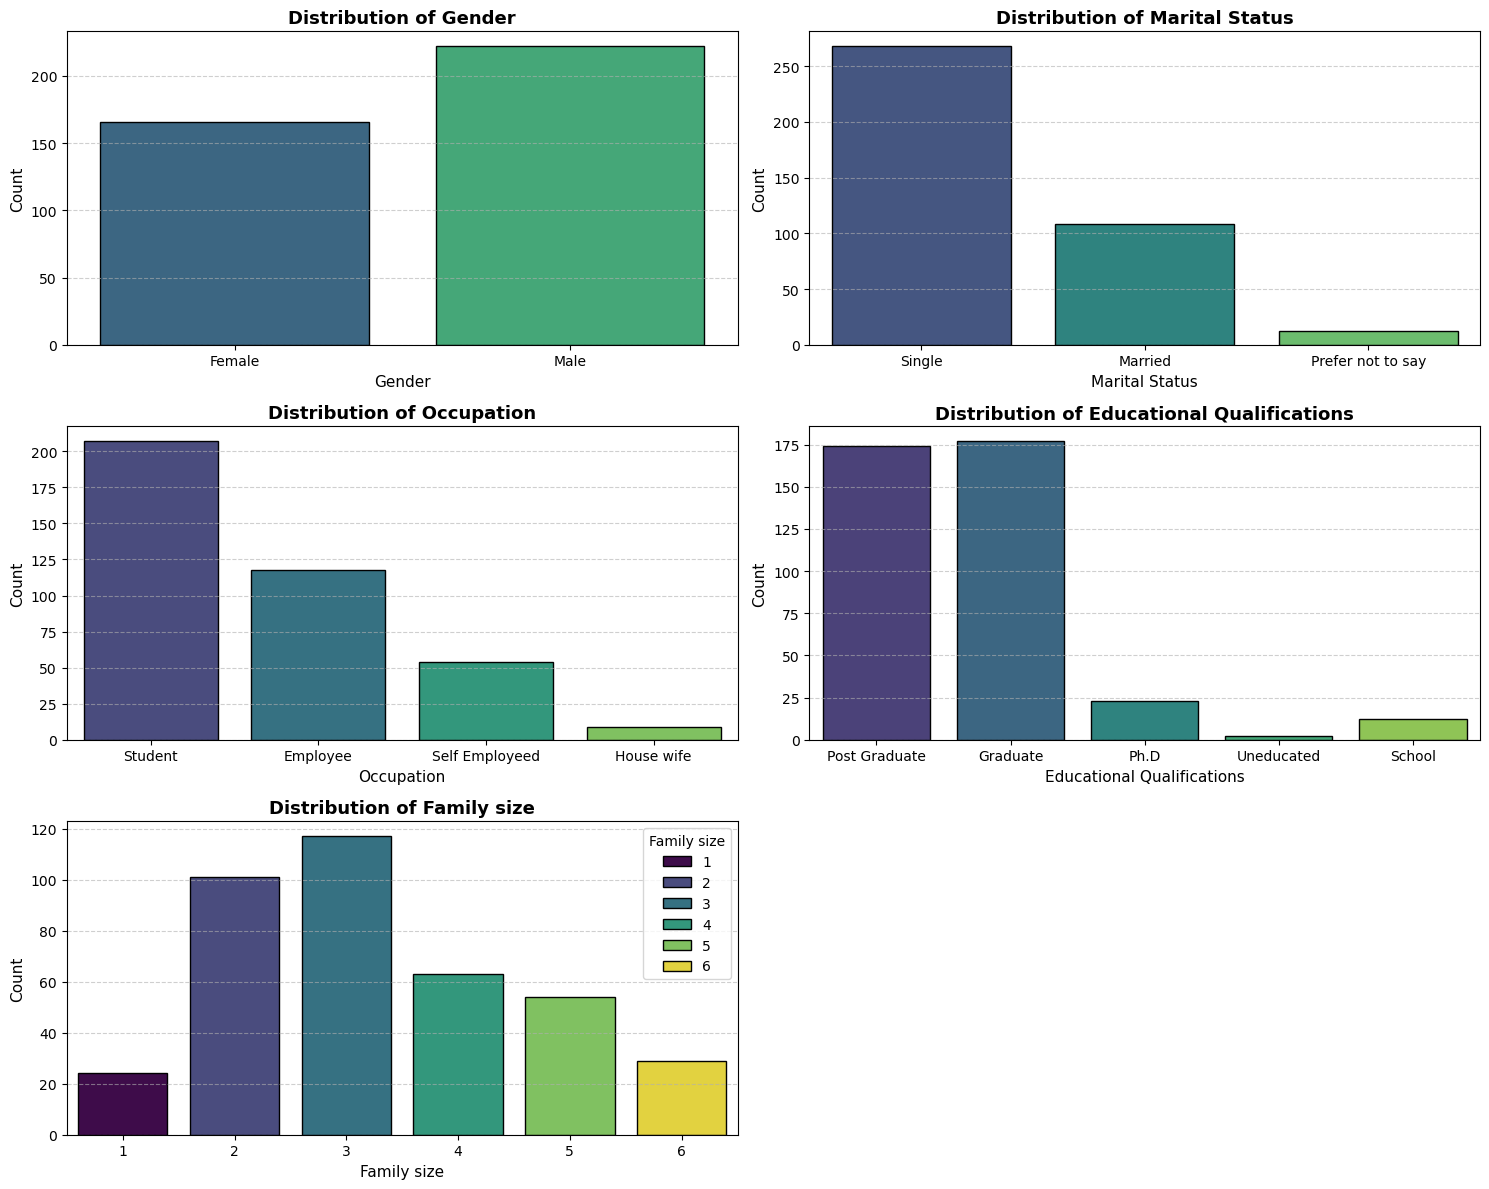

In [39]:
cols = ['Gender', 'Marital Status', 'Occupation', 
        'Educational Qualifications', 'Family size']

plt.figure(figsize=(15,12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[col], hue=df[col], palette='viridis', edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=13, fontweight='bold')
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Count", fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [50]:
agree_cols = [col for col in df.columns if df[col].isin(['Agree', 'Disagree', 'Yes', 'No']).any()]
print("Agree/Disagree Columns:")
for col_to_remove in ['Output', 'Reviews']:
    if col_to_remove in agree_cols:
        agree_cols.remove(col_to_remove)
print(agree_cols)

Agree/Disagree Columns:
['Ease and convenient', 'Time saving', 'More restaurant choices', 'Easy Payment option', 'More Offers and Discount', 'Good Food quality', 'Good Tracking system', 'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene', 'Bad past experience', 'Unavailability', 'Unaffordable', 'Long delivery time', 'Delay of delivery person getting assigned', 'Delay of delivery person picking up food', 'Wrong order delivered', 'Missing item', 'Order placed by mistake', 'Influence of time', 'Residence in busy location', 'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time', 'Delivery person ability', 'Influence of rating']


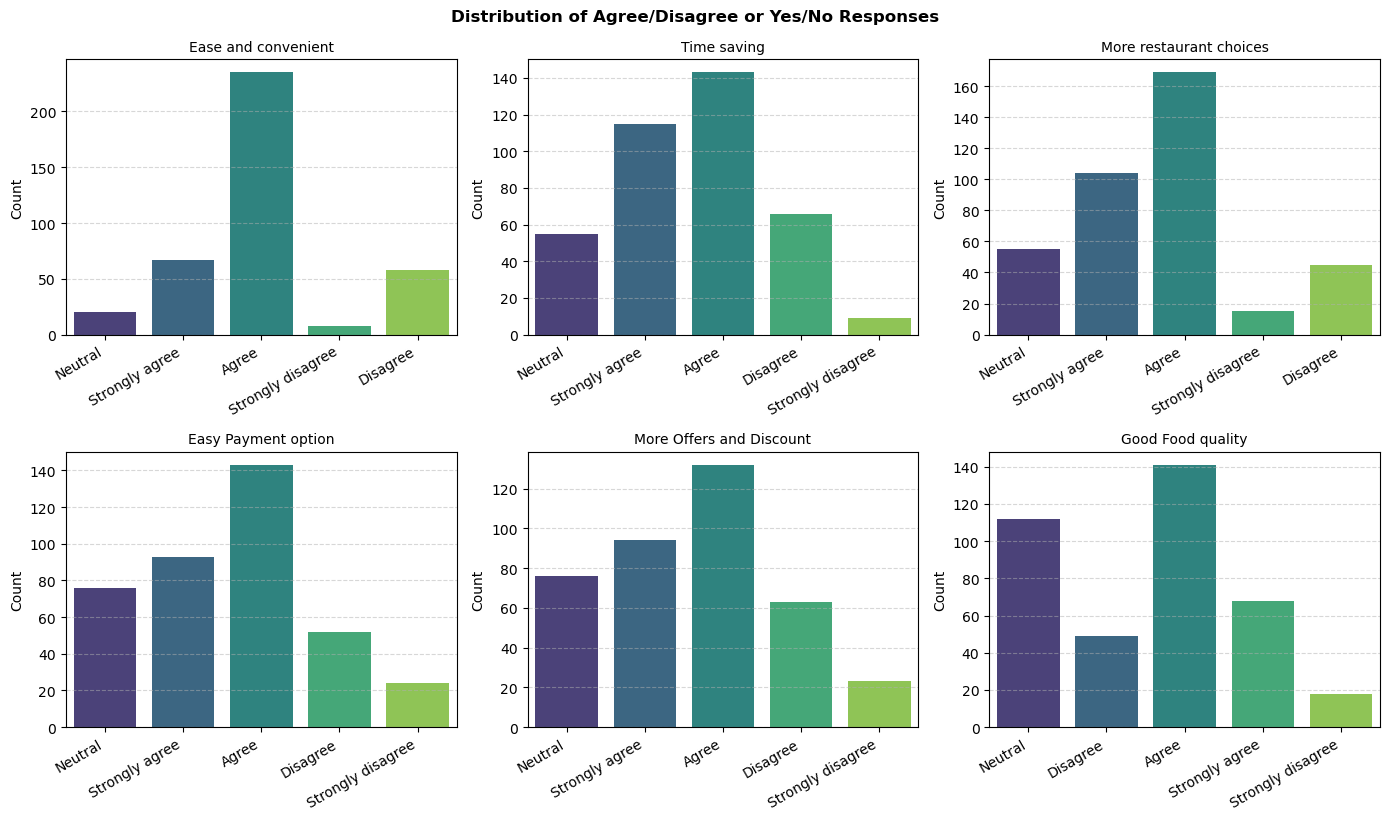

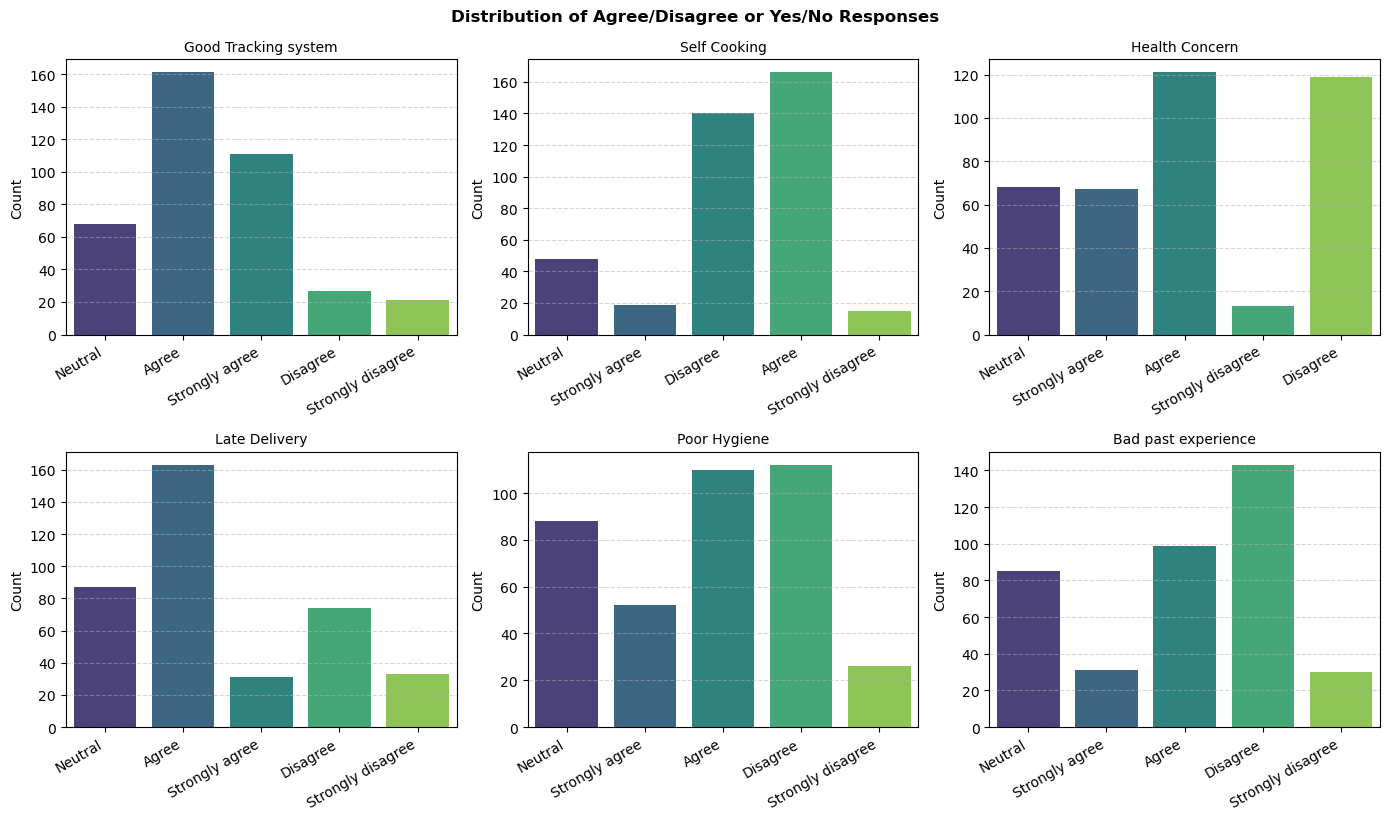

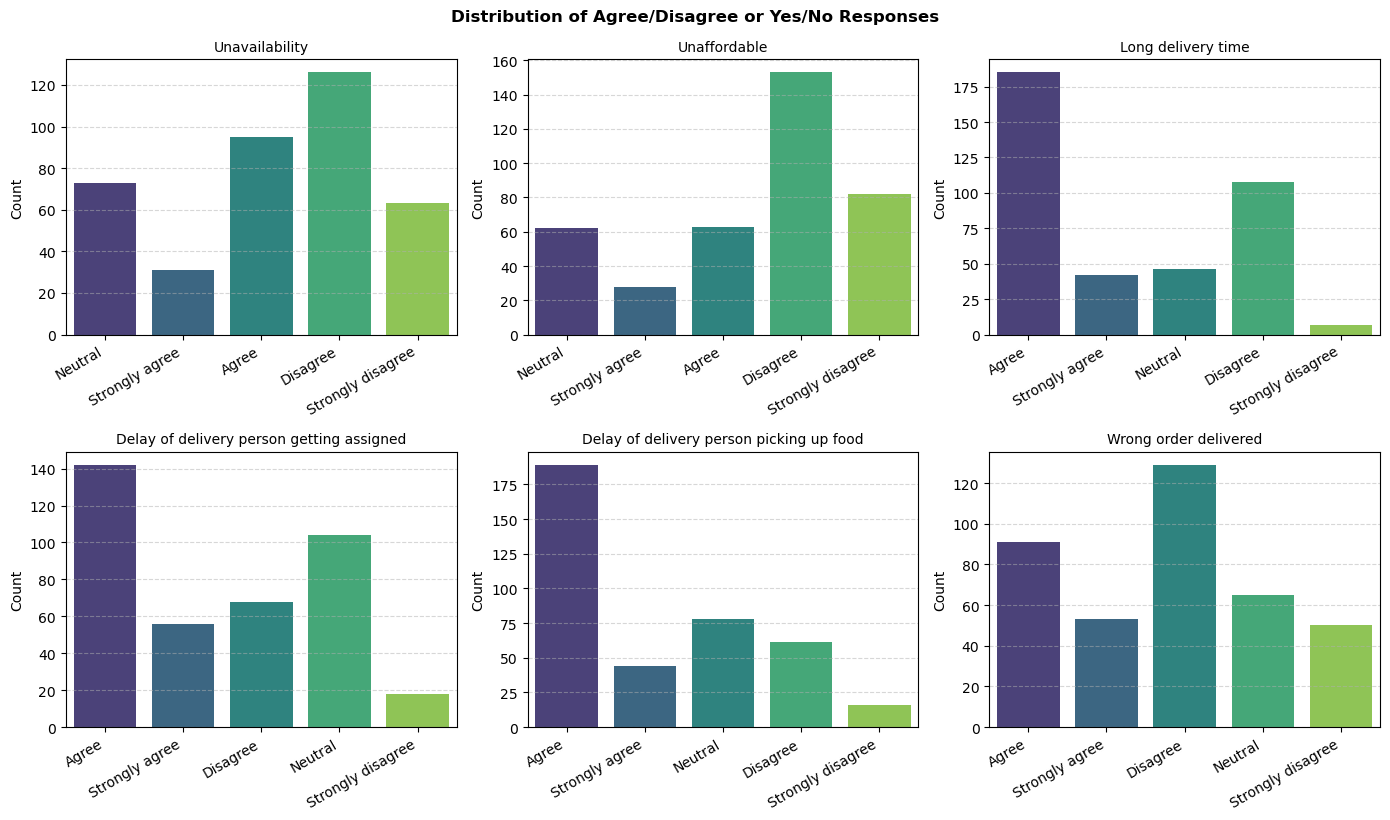

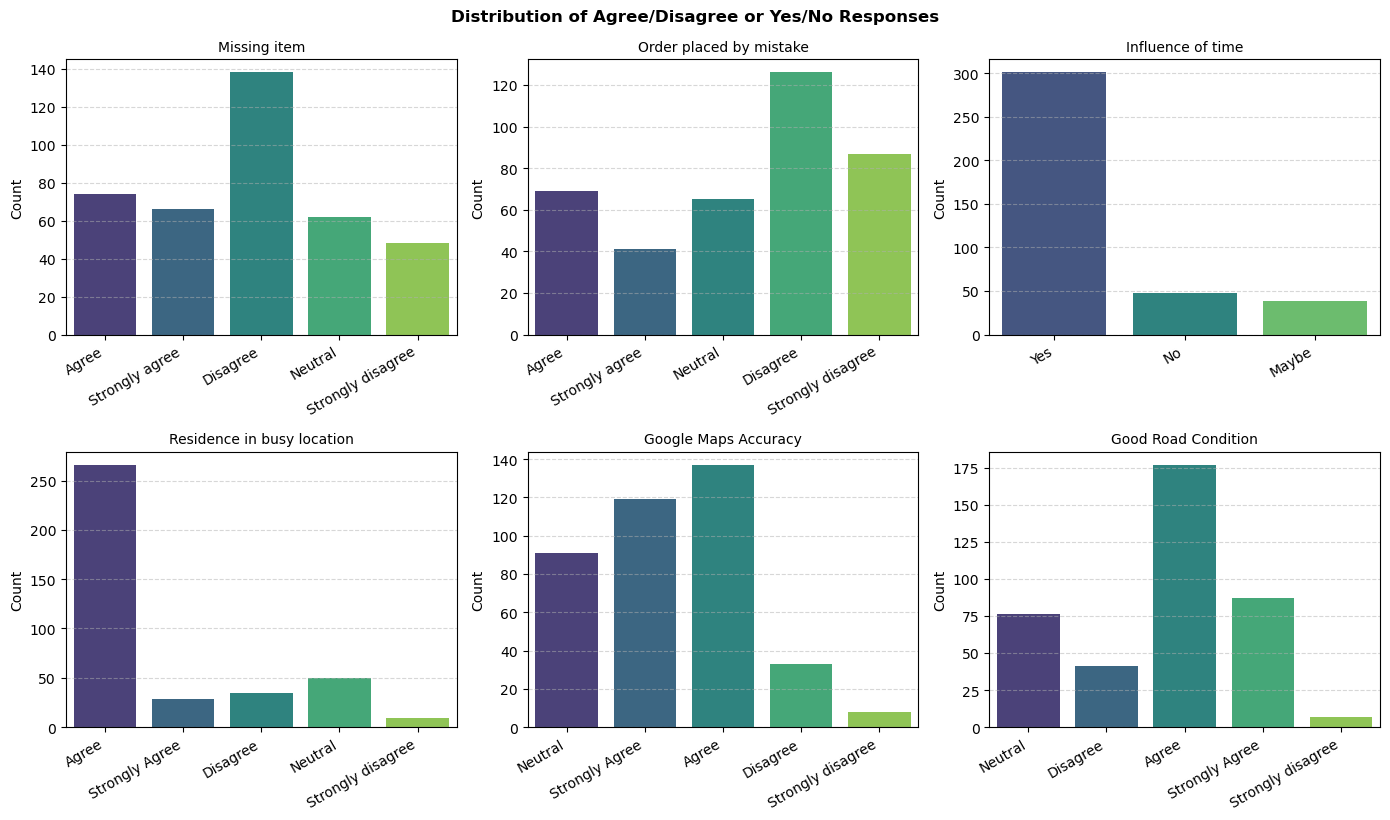

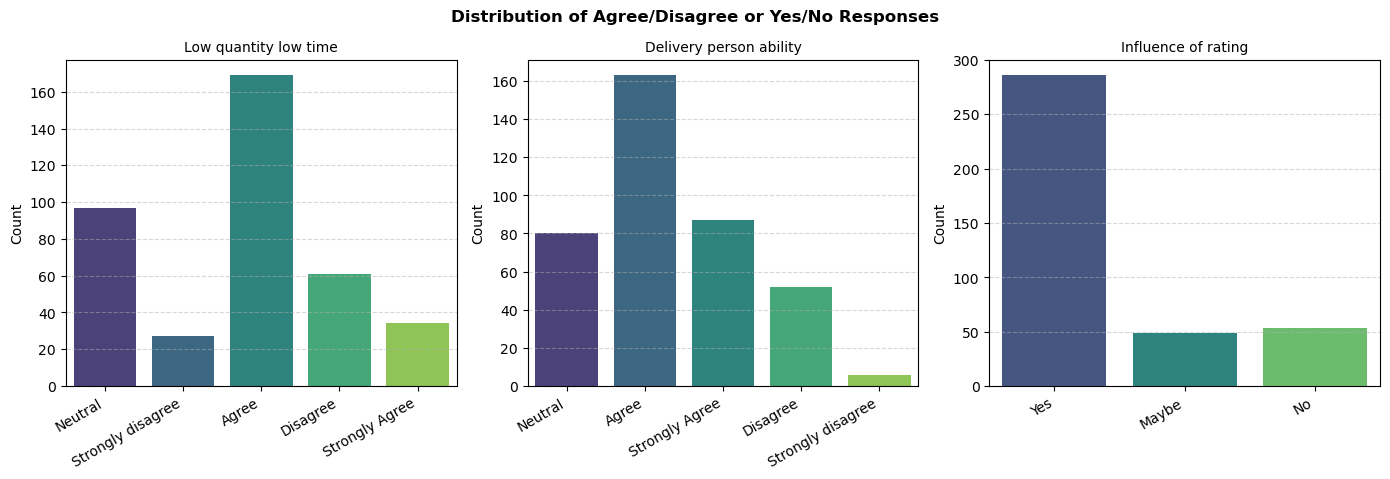

In [71]:
batch_size = 6

for i in range(0, len(agree_cols), batch_size):
    batch = agree_cols[i:i+batch_size]

    plt.figure(figsize=(14, 8))

    for j, col in enumerate(batch, 1):
        plt.subplot(2, 3, j)
        sns.countplot(x=df[col], hue=df[col], palette='viridis', legend=False)
        plt.title(col, fontsize=10)
        plt.xlabel("")
        plt.ylabel("Count")
        plt.xticks(rotation=30, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.suptitle("Distribution of Agree/Disagree or Yes/No Responses",y=1.02, fontweight='bold')
    plt.show()

In [56]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [61]:
corr = df_encoded.corr()

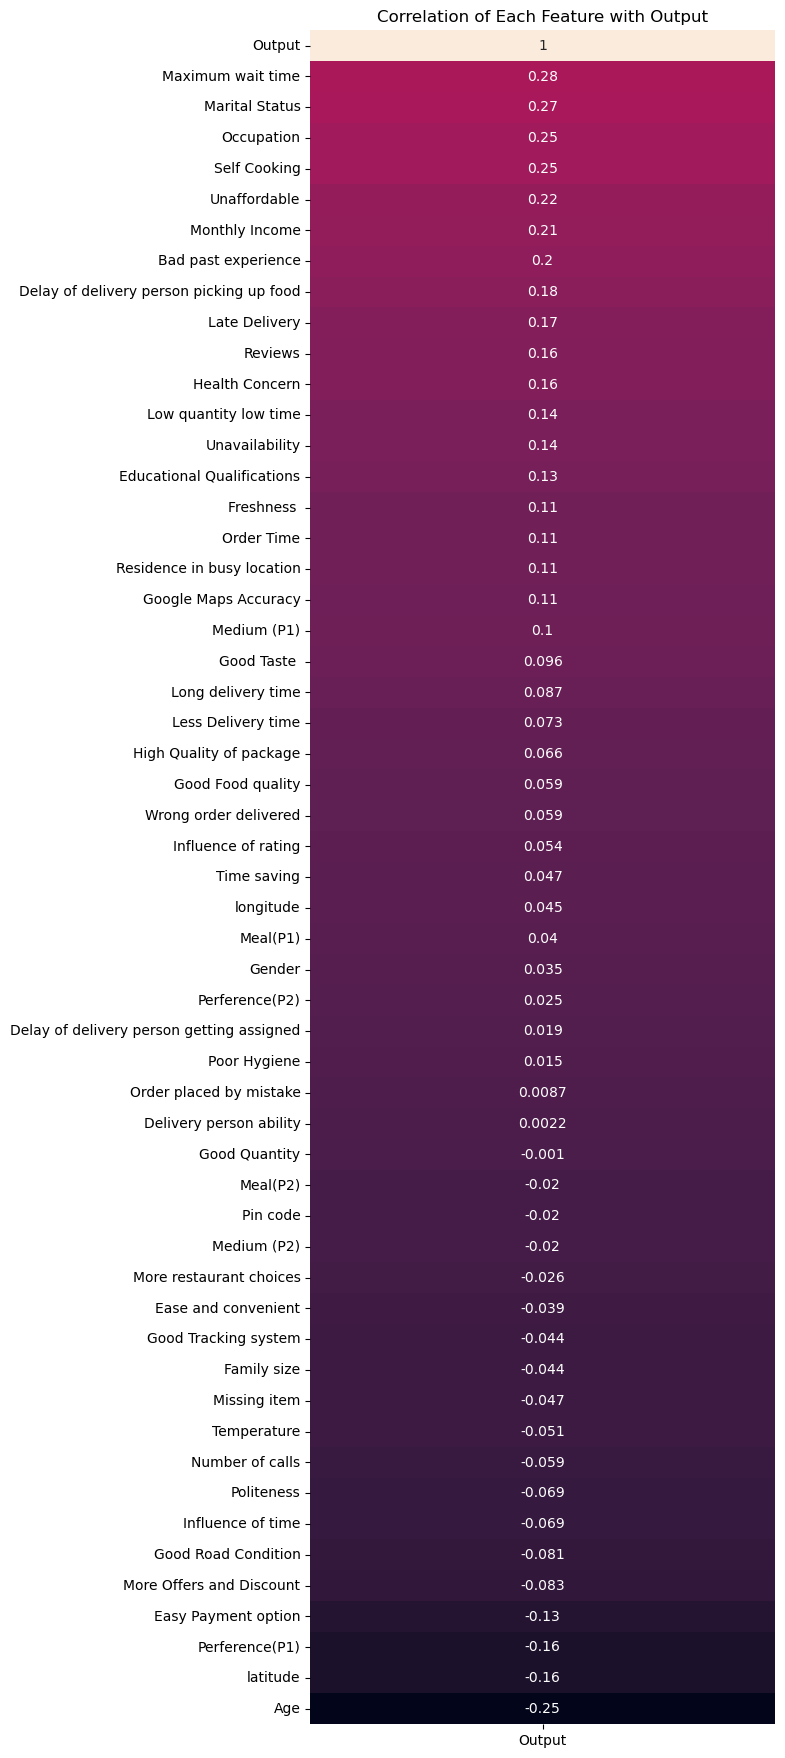

In [72]:
corr_output = corr[['Output']].sort_values(by='Output', ascending=False)

plt.figure(figsize=(6, len(corr_output) * 0.4))
sns.heatmap(corr_output, annot=True, cbar=False)
plt.title("Correlation of Each Feature with Output")
plt.show()
